# Lecture 9: Functions #

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Histogram Review

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
ages = 2023 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [4]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 105)

In [5]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,21
10,17
15,41
25,43
40,57
65,21
105,0


In [6]:
num_movies = sum(binned_data.column('Age count'))
num_movies

200

In [7]:
percents = binned_data.column('Age count')/num_movies * 100
binned_data = binned_data.with_column('Percent', percents)

In [8]:
binned_data

bin,Age count,Percent
0,0,0
5,21,10.5
10,17,8.5
15,41,20.5
25,43,21.5
40,57,28.5
65,21,10.5
105,0,0


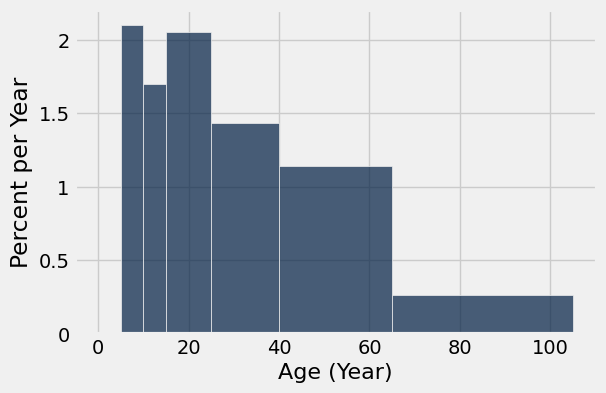

In [9]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [10]:
# Question: What is the height of the [40, 65] bin?

percent = binned_data.where('bin', 40).column('Percent').item(0)

In [11]:
width = 65 - 40

In [12]:
height = percent / width
height

1.14

## Defining Functions ##  

Example: Create a function that takes a numerical input and triples it: $\textsf{triple}(x)=3\,x$

In [4]:
def triple(x):
    return 3 * x

In [14]:
triple(3)

9

We can also assign a value to a name, and call the function on the name:

In [15]:
num = 4

In [16]:
triple(num)

12

In [17]:
triple(num * 5)

60

## The Anatomy of a Function ##  
    
```python
def functionname(Arguments_Parameters_Expressions_or_Values):     
      return return_expression
```

## Functions are Type-Agnostic  ## 

In [5]:
triple('ha')

'hahaha'

In [6]:
np.arange(4)

array([0, 1, 2, 3])

Feed the array above into our function `triple` to see what is produced:

In [7]:
triple(np.arange(4))

array([0, 3, 6, 9])

### Discussion Question ###

```python
def f(s):     
      return np.round(s / sum(s) * 100, 2)
```

In [21]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [22]:
first_four=make_array(1,2,3,4)
first_four

array([1, 2, 3, 4], dtype=int64)

In [23]:
percent_of_total(first_four)

array([ 10.,  20.,  30.,  40.])

In [24]:
percent_of_total(make_array(1, 213, 38))

array([  0.4 ,  84.52,  15.08])

### Functions Can Take Multiple Arguments ###

Example: Calculate the Hypotenuse Length of a Right Triangle


Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

In [25]:
def hypotenuse(x, y):
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [26]:
hypotenuse(1, 2)

2.23606797749979

In [27]:
hypotenuse(3, 4)

5.0

We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [28]:
def hypotenuse(x,y):
    return (x ** 2 + y ** 2) ** 0.5

In [29]:
hypotenuse(9, 12)

15.0

### Example: A function that takes the year of birth of a person and produces their age in years. ###

In [11]:
def age(year):
    age = 2023 - year
    return age

In [31]:
age(1942)

81

Now add some bells and whistles:  Take person's name and year of birth (two arguments). Produce a sentence that states how old they are.

In [18]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year)) + ' years old.'

In [19]:
name_and_age('Joe', 1942)

'Joe is 81 years old.'

## Apply ##

In [9]:
staff = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
staff

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [12]:
staff.apply(age, 'Birth Year')

array([ 38,  35,  56, 119], dtype=int64)

In [15]:
make_array(age(staff.column('Birth Year').item(0)),
           age(staff.column('Birth Year').item(1)),
           age(staff.column('Birth Year').item(2)),
           age(staff.column('Birth Year').item(3)))

array([ 38,  35,  56, 119], dtype=int64)

In [20]:
staff.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 38 years old.', 'Pam is 35 years old.',
       'Michael is 56 years old.', 'Creed is 119 years old.'],
      dtype='<U24')